In [2]:
#Procesamiento de imagenes con scikit-image
import numpy as np
import matplotlib.pyplot as plt

import skimage
import skimage.data as skid
import skimage.exposure as skie
import skimage.color as color

from skimage import img_as_float
from skimage import img_as_ubyte
 
from skimage.morphology import disk
from skimage.filters.rank import median
from skimage.filters.rank import mean

from ipywidgets import interact
import seaborn

%matplotlib inline

dtype('uint8')

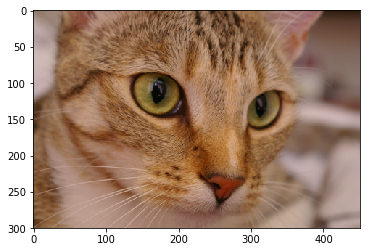

In [3]:
imagen= skid.chelsea() #elijo una imagen de ejemplo
plt.imshow(imagen) #muestro la imagen
#plt.axis('off') #saco los ejes
imagen.dtype

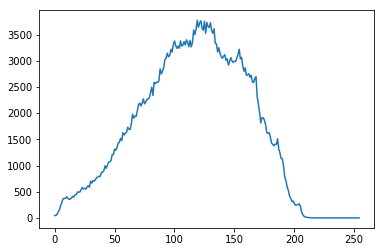

In [33]:
ejeX=np.arange(0,256) #[0,..,255]
hist=np.histogram(imagen,ejeX) # [[imagen],[0,..,255]]
# hist[0] => [valores]
# hist[1] => [0,..,255]
# hist[1][:-1] => [0,..254]
plt.plot(hist[1][:-1],hist[0])


dtype('float64')

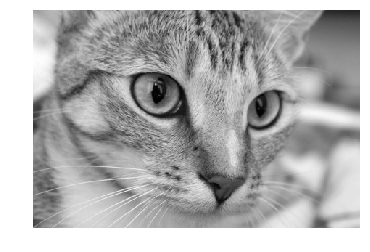

In [63]:
gris=color.rgb2gray(imagen) #convierto la imagen a b&w

plt.imshow(gris, cmap='gray') #muestro la imagen
plt.axis('off') #saco los ejes
gris.dtype

dtype('float64')

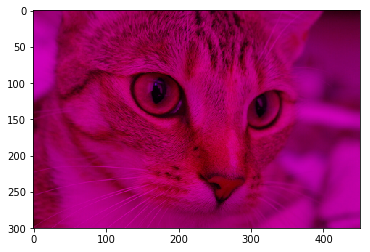

In [36]:
#cambiando la imagen a cualquier RGB
img_f=img_as_float(imagen) #convierto la imagen a flotante 
array=[1,0,1] # es el rgb(255,0,255)
plt.imshow(img_f*array)
img_f.dtype

(-0.5, 450.5, 299.5, -0.5)

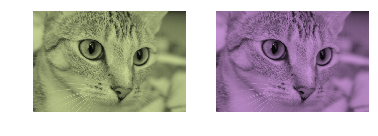

In [109]:
#usando hsv con funcion
def colorear(img,h,s=1):
    hsv=color.rgb2hsv(img)
    hsv[:,:,1]=s #agrega la saturación
    hsv[:,:,0]=h #agrega el matiz
    return color.hsv2rgb(hsv) #devuelvo la imagen en rgb

#primera imagen
plt.subplot(121)
img_hsv1=colorear(imagen,0.2,0.3) 
plt.imshow(img_hsv1)
plt.axis('off')

#segunda imagen
plt.subplot(122)
img_hsv2=colorear(imagen,0.8,0.3)
plt.imshow(img_hsv2)
plt.axis('off')

#dato: la saturación en 0.3 le da el toque vintage

(-0.5, 511.5, 511.5, -0.5)

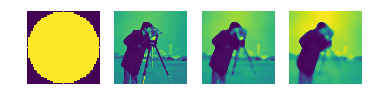

In [135]:
#Filtro median: remueve el ruido
imggris=skid.camera()
med1=disk(25)  #disco con r=25
med2=median(imggris,disk(5)) #disco con r=10
med3=median(imggris,disk(15)) #disco con r=20
med4=median(imggris,disk(25)) #disco con r=25

plt.subplot(141)
plt.imshow(med1)
plt.axis('off')

plt.subplot(142)
plt.imshow(med2)
plt.axis('off')

plt.subplot(143)
plt.imshow(med3)
plt.axis('off')

plt.subplot(144)
plt.imshow(med4)
plt.axis('off')

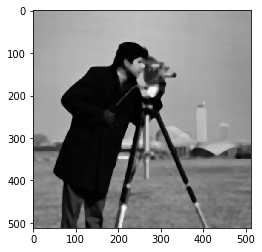

In [141]:
#filtro mean: suaviza (smooth) la imagen
#mn = mean(skid.astronaut(),disk(1))
i=median(imggris,disk(5)) 
plt.imshow(i,cmap='gray')